In [3]:
from src.preprocessing.reader import Reader

r = Reader('../data/digital_leaders')
print(r)

Image path: ../data/digital_leaders/images
Mask path: ../data/digital_leaders/masks


In [4]:
from tqdm.notebook import tqdm

image_stats = {
    "width": [],
    "height": [],
    "ratio": [],
    "area": [],
    "width x height": [],
}

for i in tqdm(range(21)):
    img, mask = r.read_sample(i)
    image_stats["width"].append(img.shape[0])
    image_stats["height"].append(img.shape[1])
    image_stats["ratio"].append(img.shape[0] / img.shape[1])
    image_stats["area"].append(img.shape[0] * img.shape[1])
    image_stats["width x height"].append("{} x {}".format(img.shape[0], img.shape[1]))

  0%|          | 0/21 [00:00<?, ?it/s]

In [5]:
# sizes sorted by area size
sorted(image_stats["width x height"],
       key=lambda x: - int(x.split(" x ")[0]) * int(x.split(" x ")[1]))

['8661 x 12498',
 '9631 x 10380',
 '7276 x 10487',
 '7347 x 7526',
 '6394 x 7920',
 '5885 x 7811',
 '6206 x 6206',
 '5343 x 6810',
 '5555 x 6451',
 '5262 x 6546',
 '5849 x 5108',
 '4999 x 5835',
 '4855 x 5678',
 '5341 x 5101',
 '4882 x 5537',
 '3824 x 5973',
 '3455 x 6430',
 '4996 x 4186',
 '3953 x 4411',
 '4010 x 4148',
 '2959 x 3787']

In [26]:
test_idx = 1
test_image, test_mask = r.read_sample(test_idx)
test_mask.shape, test_mask.dtype, test_mask.min(), test_mask.max()

((3824, 5973, 3), dtype('uint8'), 0, 1)

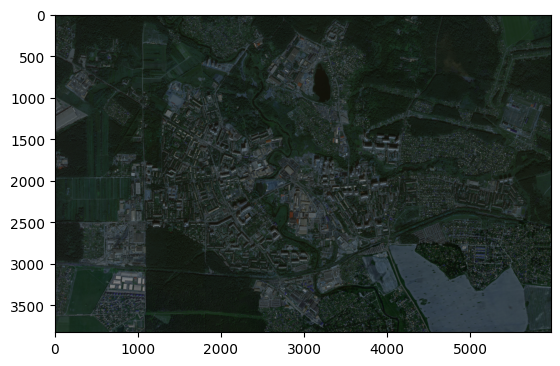

In [27]:
import matplotlib.pyplot as plt
plt.imshow(test_image)
plt.imshow(test_mask, alpha=0.5, cmap="jet")
plt.show()

In [28]:
# create overlayed with mask image
import cv2

def create_red_overlay(image, mask):
    new_image = image.copy()
    new_image[mask != 0] = 255
    return new_image

# and save it
cv2.imwrite(f"../artifacts/images/overlay_{test_idx}.png", create_red_overlay(test_image, test_mask))
# also copy original
cv2.imwrite(f"../artifacts/images/original_{test_idx}.png", test_image)

True